## Ada boost

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import graphviz
from random import randint

from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, train_test_split

## Reading [Smoke Detection](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/) dataset

[Real-time Smoke Detection with AI-based Sensor Fusion](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6)

In [23]:
smoke_train = pd.read_csv("./smoke_detection_iot.csv")
# smoke_edited = smoke_train.drop(columns=['Index', 'UTC', 'CNT', 'PM1.0', 'eCO2[ppm]'])
# smoke_edited = smoke_train.drop(columns=['Index', 'UTC', 'CNT'])
smoke_edited = smoke_train.drop(columns=['Index', 'UTC', 'CNT', 'PM1.0', 'eCO2[ppm]'])
smoke_edited.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,12306,18520,939.735,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,12345,18651,939.744,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,12374,18764,939.738,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,12390,18849,939.736,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,12403,18921,939.744,0.0,0.0,0.0,0.0,0


In [24]:
smoke_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   Raw H2          62630 non-null  int64  
 4   Raw Ethanol     62630 non-null  int64  
 5   Pressure[hPa]   62630 non-null  float64
 6   PM2.5           62630 non-null  float64
 7   NC0.5           62630 non-null  float64
 8   NC1.0           62630 non-null  float64
 9   NC2.5           62630 non-null  float64
 10  Fire Alarm      62630 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 5.3 MB


## Processing Smoke detection

In [25]:
smoke_edited.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

## Split data

In [26]:
X = smoke_edited.drop(['Fire Alarm'], axis = 1)
y = smoke_edited['Fire Alarm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Standartization

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [28]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

## Random forest model

In [29]:
random_forest = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=200)
random_forest.fit(scaled_X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [30]:
pred = random_forest.predict(scaled_X_test)

## Evaluation

In [31]:
print(confusion_matrix(y_test,pred))

[[3476  112]
 [ 186 8752]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3588
           1       0.99      0.98      0.98      8938

    accuracy                           0.98     12526
   macro avg       0.97      0.97      0.97     12526
weighted avg       0.98      0.98      0.98     12526


In [33]:
print(accuracy_score(y_test,pred))

0.9762094842727127


## Choosing parameter
n_estimators -- кількість дерев рішень у лісі. Збільшення цього гіперпараметра загалом покращує продуктивність моделі, але також збільшує обчислювальні витрати на навчання та прогнозування.
max_depth: максимальна глибина кожного дерева рішень у лісі. Встановлення більшого значення для max_depth може призвести до overfitting, тоді як встановлення занадто низького значення може призвести до underfitting.

In [34]:
error_rate = []

for i in range(1,30):
    random_forest = RandomForestClassifier(max_depth=i, random_state=0, n_estimators=200)
    random_forest.fit(scaled_X_train, y_train)
    pred_i = random_forest.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

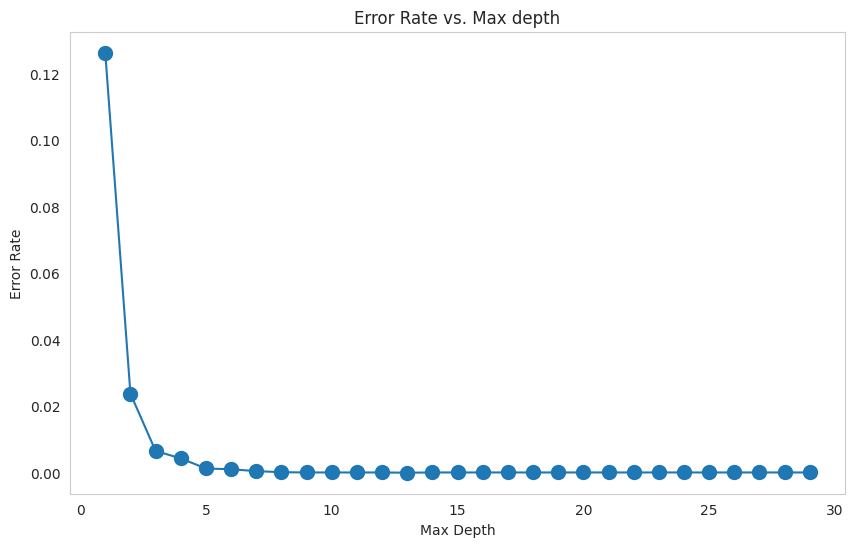

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. Max depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.grid()

In [36]:
error_rate = []

for i in range(1,500):
    random_forest = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=i)
    random_forest.fit(scaled_X_train, y_train)
    pred_i = random_forest.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

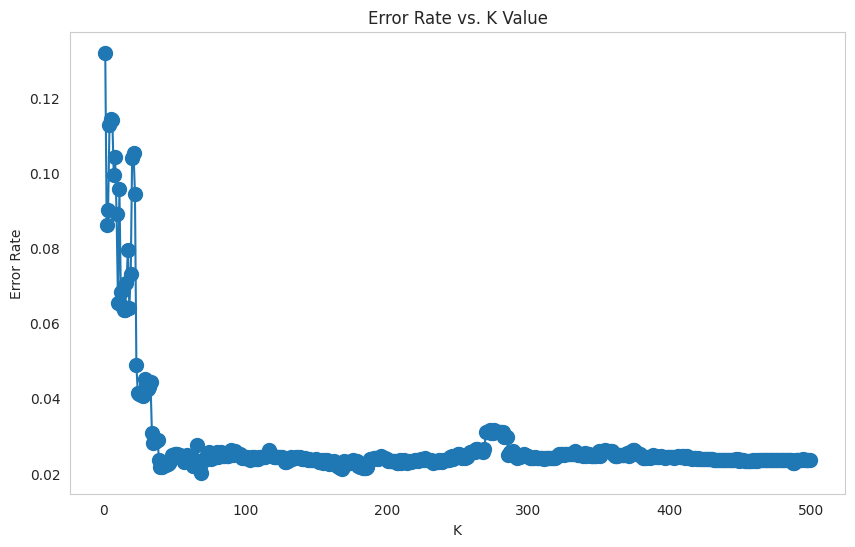

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [42]:
random_forest = RandomForestClassifier()
random_forest.fit(scaled_X_train, y_train)
pred = random_forest.predict(scaled_X_test)
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(random_forest, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
print('Best hyperparameters:',  rand_search)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

Best hyperparameters: RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': 20, 'n_estimators': 181})
[[3588    0]
 [   0 8938]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3588
           1       1.00      1.00      1.00      8938

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


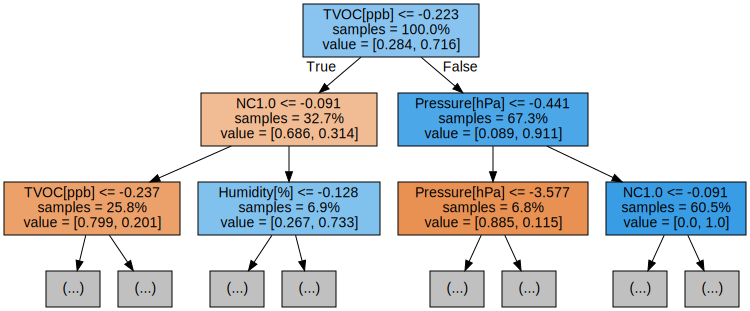

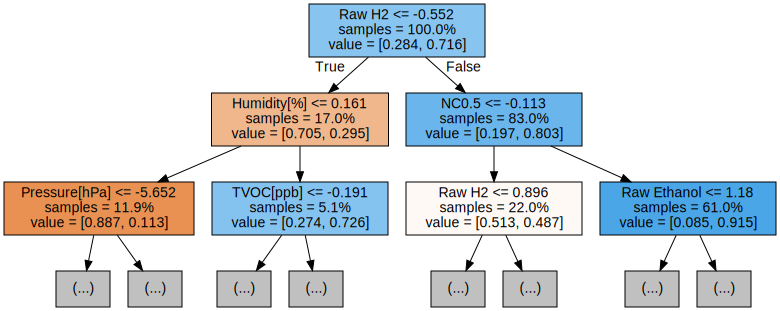

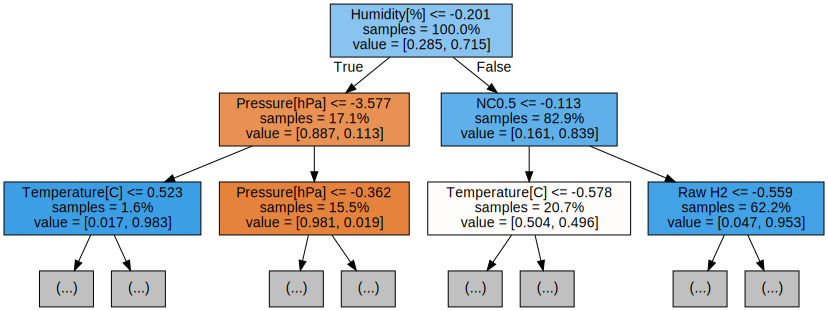

In [44]:
for i in range(3):
    tree = random_forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)